In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

train_df = pd.read_csv("./inputs/train.csv")
test_df = pd.read_csv("./inputs/test.csv")

test_df.Fare.fillna(test_df.Fare.mean(), inplace=True)
data_df = train_df.append(test_df)
passenger_id = test_df['PassengerId']

train_df.drop(['PassengerId'], axis=1, inplace=True)
test_df.drop(['PassengerId'], axis=1, inplace=True)
test_df.shape


(418, 10)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
********************
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64


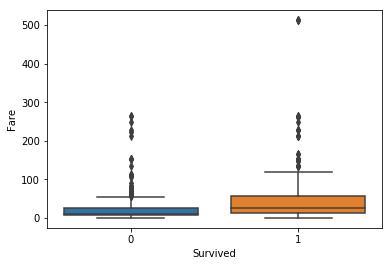

In [2]:
print(train_df.isnull().sum())
print(''.center(20, "*"))
print(test_df.isnull().sum())
sns.boxplot(x='Survived', y='Fare', data=train_df)


In [3]:
train_df['Sex'] = train_df.Sex.apply(lambda x: 0 if x == "female" else 1)
test_df['Sex'] = test_df.Sex.apply(lambda x: 0 if x == "female" else 1)
train_df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [5]:
for name_string in data_df['Name']:
    data_df['Title']=data_df['Name'].str.extract('([A-Za-z]+)\.',expand=True)

data_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [6]:
mapping = {
    'Mlle': 'Miss', 
    'Major': 'Mr',
    'Col': 'Mr',
    'Sir': 'Mr',
    'Don': 'Mr',
    'Mme': 'Miss',
    'Jonkheer': 'Mr',
    'Lady': 'Mrs',
    'Capt': 'Mr',
    'Countess': 'Mrs',
    'Ms': 'Miss',
    'Dona': 'Mrs'}

data_df.replace({'Title': mapping}, inplace=True)

train_df['Title'] = data_df['Title'][:891]
test_df['Title'] = data_df['Title'][891:]


In [7]:
titles=['Mr','Miss','Mrs','Master','Rev','Dr']
for title in titles:
    age_to_impute = data_df.groupby('Title')['Age'].median()[titles.index(title)]
    data_df.loc[(data_df['Age'].isnull()) & (data_df['Title'] == title), 'Age'] = age_to_impute


train_df['Age'] = data_df['Age'][:891]
test_df['Age'] = data_df['Age'][891:]
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Title         0
dtype: int64

In [8]:
test_df.drop(['Title','Cabin'],axis=1,inplace=True)
train_df.drop(['Title','Cabin'],axis=1,inplace=True)

train_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [9]:
train_df['Embarked'].fillna('S',inplace=True)
#train_df.Embarked.value_counts()
train_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [10]:
embarked_values = {'S':1,'C':2,'Q':3}
train_df.replace({'Embarked': embarked_values}, inplace=True)
test_df.replace({'Embarked': embarked_values}, inplace=True)
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,3
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,1
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,3
3,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,1


Text(0.5, 1.0, 'Correlations Among Features')

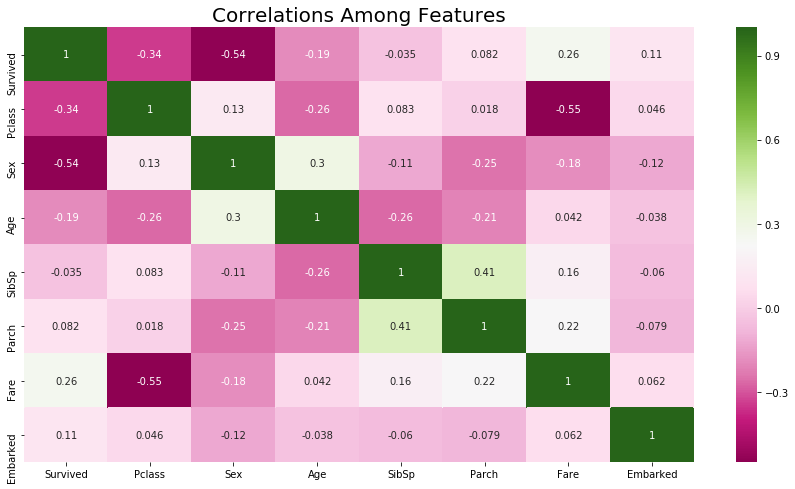

In [11]:
plt.subplots(figsize = (15,8))
sns.heatmap(train_df.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 20)

([<matplotlib.axis.XTick at 0x7fcea3214940>,
 <a list of 2 Text xticklabel objects>)

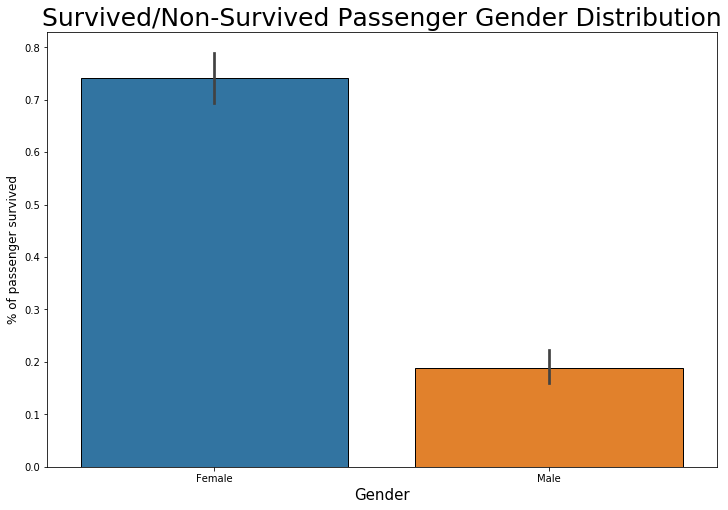

In [12]:
plt.subplots(figsize = (12,8))
sns.barplot(x = "Sex", y = "Survived", data=train_df, edgecolor=(0,0,0), linewidth=1)
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25)
labels = ['Female', 'Male']
plt.ylabel("% of passenger survived", fontsize = 12)
plt.xlabel("Gender",fontsize = 15)
plt.xticks(sorted(train_df.Sex.unique()), labels)


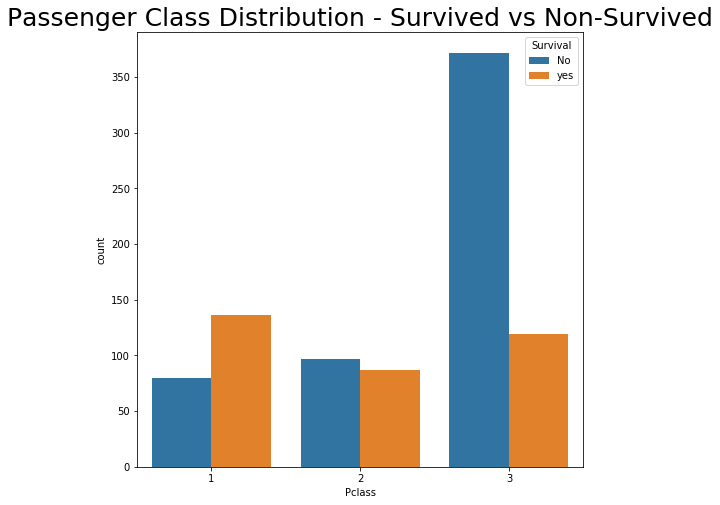

In [13]:
plt.subplots(figsize = (8,8))
ax=sns.countplot(x='Pclass',hue='Survived',data=train_df)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")

Text(0.5, 0, 'Fare')

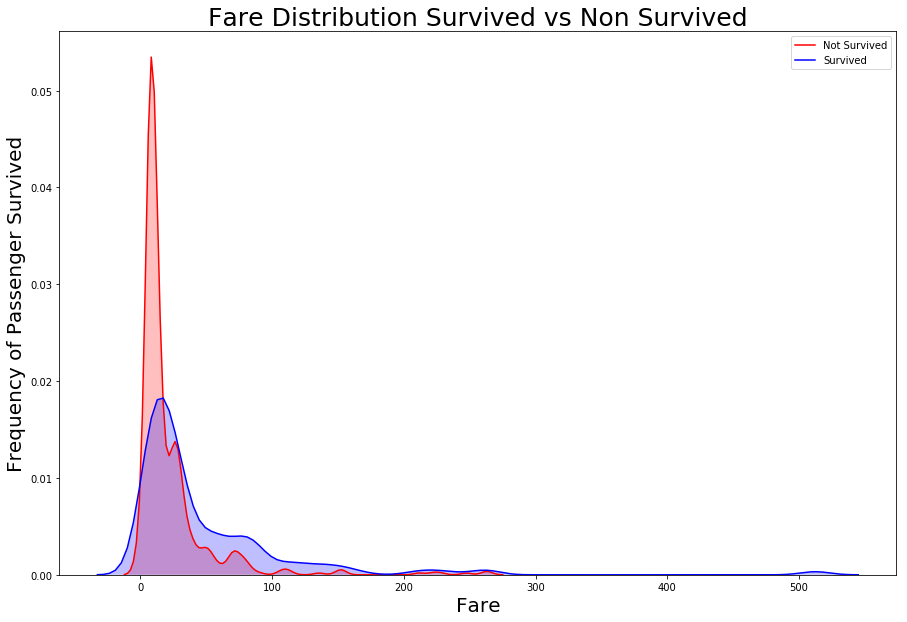

In [14]:
plt.subplots(figsize=(15,10))

ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )
plt.title('Fare Distribution Survived vs Non Survived',fontsize=25)
plt.ylabel('Frequency of Passenger Survived',fontsize=20)
plt.xlabel('Fare',fontsize=20)

In [15]:
X = train_df.drop(['Survived','Name','Ticket'], 1)
y = train_df['Survived']
X_test = test_df.copy()
X_test = X_test.drop(['Name', 'Ticket'],1)

X_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, y)
Y_pred = random_forest.predict(X_test)
random_forest.score(X, y)
acc_random_forest = round(random_forest.score(X, y) * 100, 2)
acc_random_forest

98.2

In [17]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X, y) * 100, 2)
acc_decision_tree

98.2

In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X, y) * 100, 2)
acc_log

80.58

In [19]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X, y)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X, y) * 100, 2)
acc_gaussian

79.57

In [20]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X, y)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X, y) * 100, 2)
acc_perceptron

68.13

In [21]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X, y)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X, y) * 100, 2)
acc_sgd

62.96

Text(0.5, 0, 'Model Type')

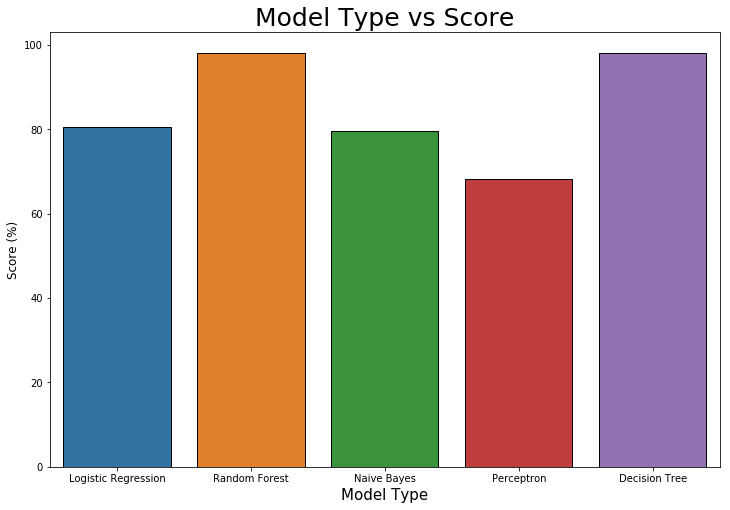

In [22]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Decision Tree'],
    'Score': [acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_decision_tree]})

models.sort_values(by='Score', ascending=False)

plt.subplots(figsize = (12,8))
sns.barplot(x = "Model", y = "Score", data=models, edgecolor=(0,0,0), linewidth=1)
plt.title("Model Type vs Score", fontsize = 25)
plt.ylabel("Score (%)", fontsize = 12)
plt.xlabel("Model Type",fontsize = 15)


In [23]:
submission = pd.DataFrame({
        "PassengerId": passenger_id,
        "Survived": Y_pred
    })
# submission.to_csv('./submission2.csv', index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
